In [1]:
import neat
import os
import evogym.envs
from evogym import is_connected, has_actuator, get_full_connectivity, hashable
import numpy as np
from pathos.multiprocessing import ProcessPool
import errno
import dill
import sys
sys.path.append('../')

import neat
from hyperneat.new_hyperNEAT import create_phenotype_network
from hyperneat.substrate import Substrate
from hyperneat.visualize import draw_net

import itertools as it
import time
import imageio

import sgr_main as sgr
from matplotlib import pyplot as plt


from substrates import morph_substrate, control_substrate
from generate_robot import generate_robot
from evogym_sim import simulate_env

In [2]:
def get_robot(genome, params, neat_config):
    cppn = neat.nn.FeedForwardNetwork.create(genome, neat_config)

    design_substrate = morph_substrate(params)
    design_net = create_phenotype_network(cppn, design_substrate)

    robot = generate_robot(design_net, params)
    if not sgr.eval_genome_constraint(robot):
        return robot, None
    connections = get_full_connectivity(robot)
    env = evogym.envs.gym.make(params["env"], body=robot, connections=connections)
    img = env.render(mode='img')
    env.close()
    return robot, img

In [3]:
ENV = "Walker-v0" # env_names = ["CaveCrawler-v0", "UpStepper-v0", "ObstacleTraverser-v1"]
STEPS = 600
ROBOT_SIZE = 5
POP = 128

directory = "results/" + ENV

# file = "run_1_population.pkl"
# defaultGen = neat.DefaultGenome
# f = lambda self, other, config: new_distance(params, morph_substrate(params), generate_robot, self, other, config)
# defaultGen.distance = f
# params = {"robot_size": ROBOT_SIZE, "env": ENV, "steps": STEPS, "pop_size": POP, "robot_substrate": "AA"}
# neat_config = neat.config.Config(
#     defaultGen,
#     neat.reproduction.DefaultReproduction, 
#     neat.species.DefaultSpeciesSet, 
#     neat.stagnation.DefaultStagnation, 
#     "../configs/hyperNEAT_config_3D_out_robot"
# )

file = "run_CPPN_1_population.pkl"
params = {"robot_size": ROBOT_SIZE, "env": ENV, "steps": STEPS, "pop_size": POP, "robot_substrate": "CPPN"}
neat_config = neat.config.Config(
    neat.genome.DefaultGenome, 
    neat.reproduction.DefaultReproduction, 
    neat.species.DefaultSpeciesSet, 
    neat.stagnation.DefaultStagnation, 
    "../configs/hyperNEAT_config_CPPN_robot"
)

with open(f"../{directory}/{file}", "rb") as file:
    pop = dill.load(file)
champion = pop.best_genome
print(champion.fitness)

6.78797211918114


!!!!!!!!!!!!!!!!!!!!!!!! Specie  73 !!!!!!!!!!!!!!!!!!!!!!!!!!!
11576 1.279590276250492


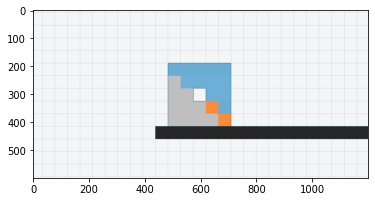

!!!!!!!!!!!!!!!!!!!!!!!! Specie  71 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  72 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  70 !!!!!!!!!!!!!!!!!!!!!!!!!!!
10921 1.6502302542259601


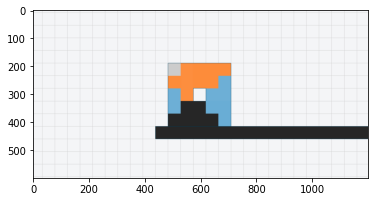

!!!!!!!!!!!!!!!!!!!!!!!! Specie  69 !!!!!!!!!!!!!!!!!!!!!!!!!!!
10837 1.767660256484524


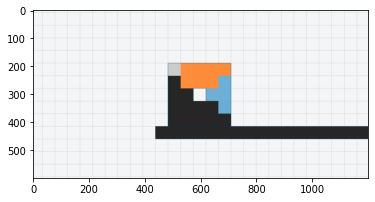

11319 1.4813436995609433


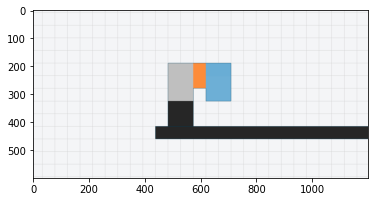

!!!!!!!!!!!!!!!!!!!!!!!! Specie  68 !!!!!!!!!!!!!!!!!!!!!!!!!!!
10618 1.5776085435997362


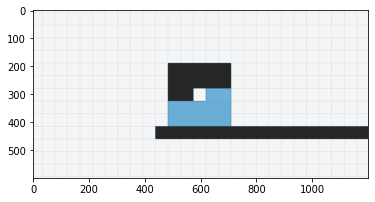

11339 1.795180216194918


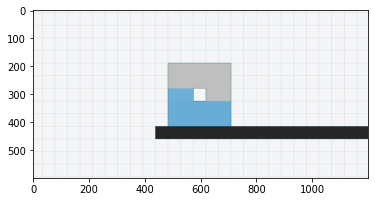

11679 1.4618807912141165


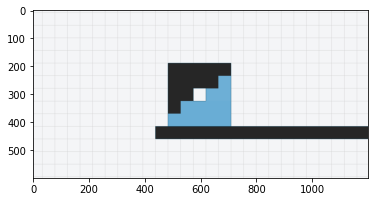

!!!!!!!!!!!!!!!!!!!!!!!! Specie  67 !!!!!!!!!!!!!!!!!!!!!!!!!!!
10672 2.040703349461333


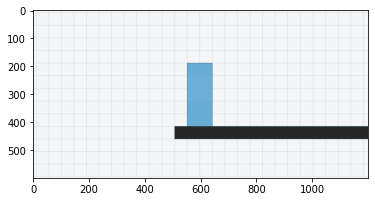

11588 1.545471270872899


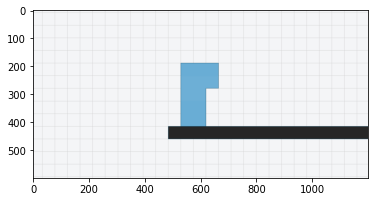

!!!!!!!!!!!!!!!!!!!!!!!! Specie  66 !!!!!!!!!!!!!!!!!!!!!!!!!!!
11351 1.989877558808518


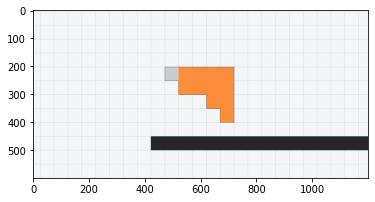

11058 2.231858147718154


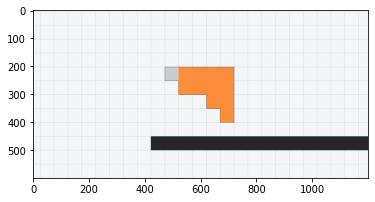

!!!!!!!!!!!!!!!!!!!!!!!! Specie  65 !!!!!!!!!!!!!!!!!!!!!!!!!!!
10356 4.577269657937876


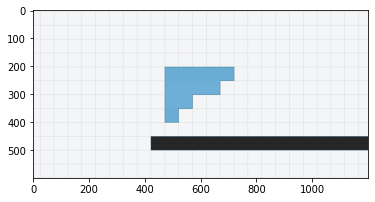

11682 3.2476867376634106


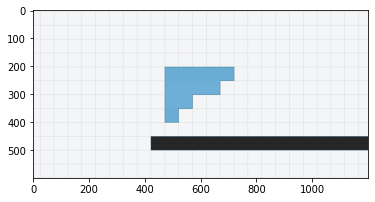

11698 2.0953943277421447


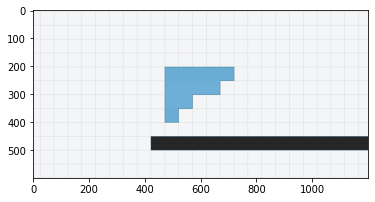

11711 3.154210229307138


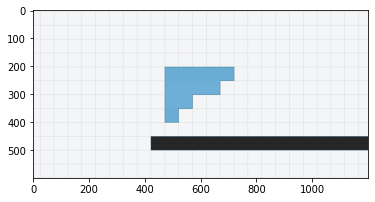

11713 1.833158126950494


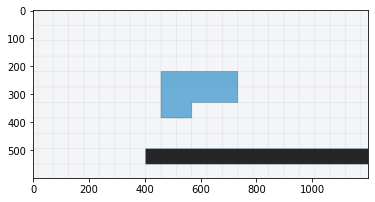

11714 2.2561812478176373


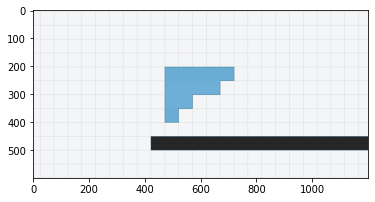

11718 4.149907777218109


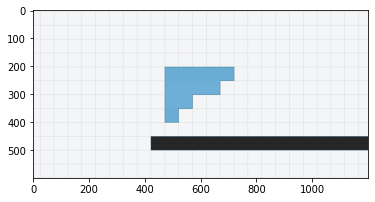

11721 2.9296840915965636


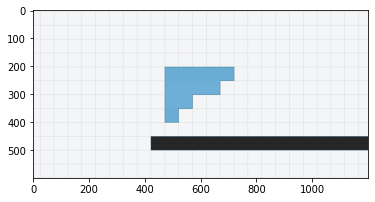

11742 2.9860433888573663


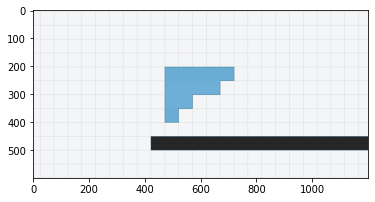

11744 3.1244287970532967


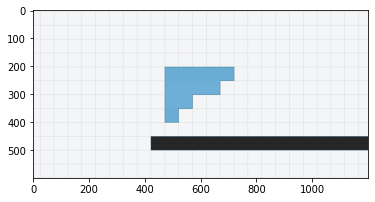

11747 3.07387583358775


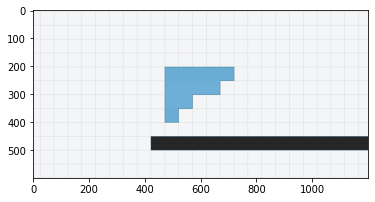

11750 3.213664882096883


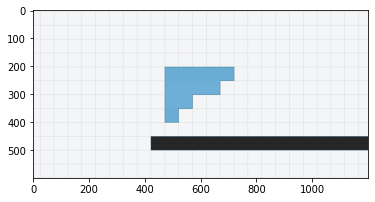

10217 4.828140301981547


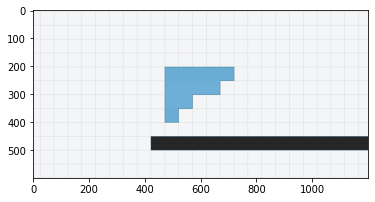

11751 2.9932227284513107


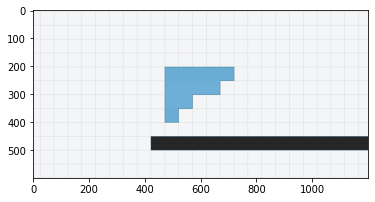

!!!!!!!!!!!!!!!!!!!!!!!! Specie  18 !!!!!!!!!!!!!!!!!!!!!!!!!!!
11695 4.229181076811029


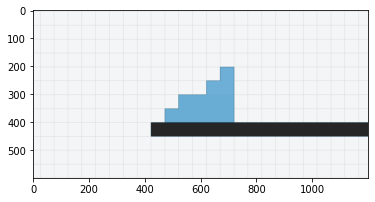

10302 5.760893415702874


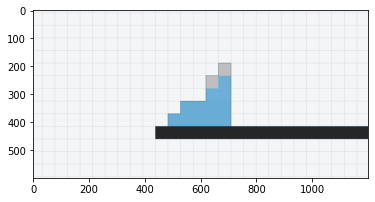

8494 5.535179449690598


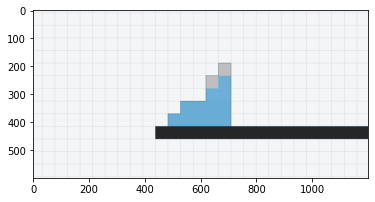

11684 1.7384981411961649


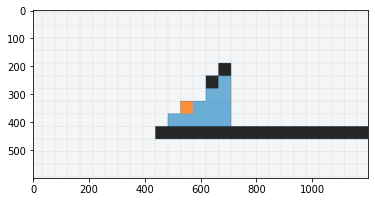

11731 1.0817338883041443


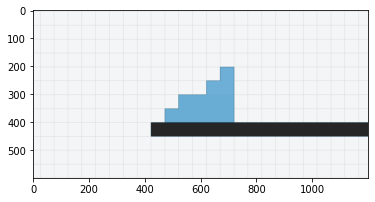

11733 1.820559228747189


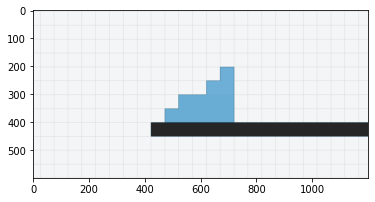

11734 2.8330212544642013


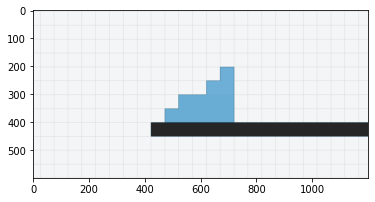

11739 1.3056198732110942


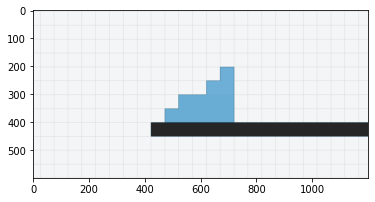

11740 2.656151407206697


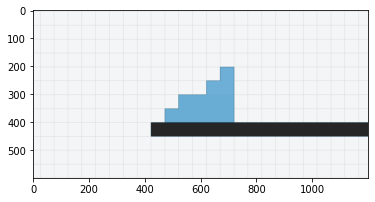

!!!!!!!!!!!!!!!!!!!!!!!! Specie  44 !!!!!!!!!!!!!!!!!!!!!!!!!!!
10891 6.163438239472358


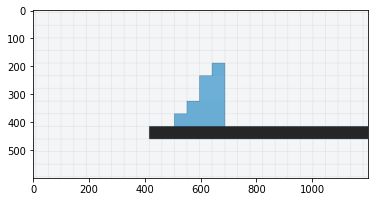

4481 6.153905095451026


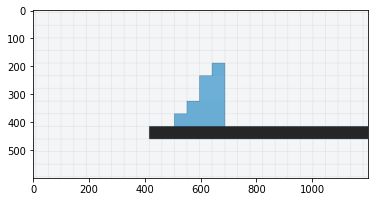

11712 4.493660281781768


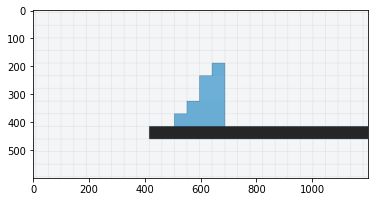

11717 4.823443744567772


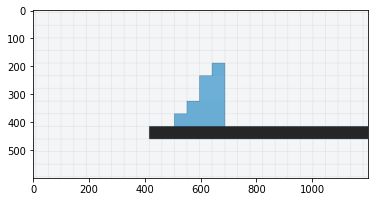

11723 5.3538248052041215


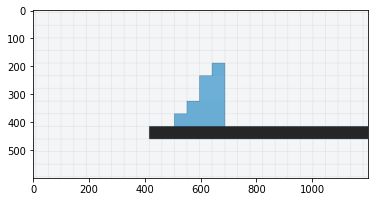

11730 1.9415676837839273


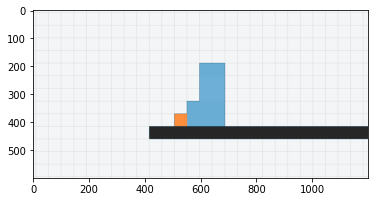

11737 4.723906150623671


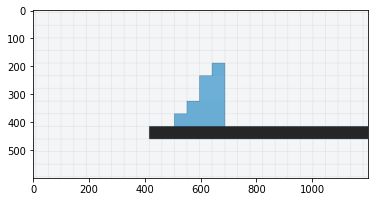

11738 5.829089340438293


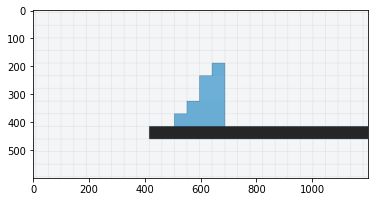

11741 4.620072816669178


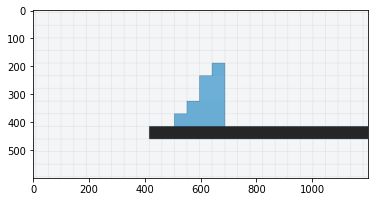

11743 4.255120378989614


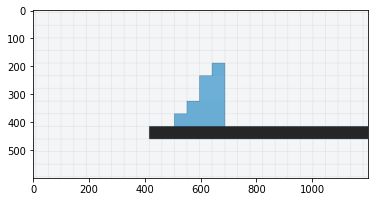

11745 5.52601556073416


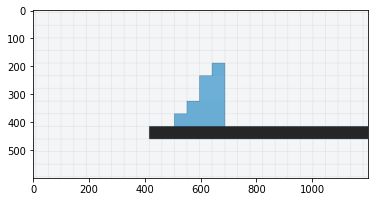

11746 4.415459120581705


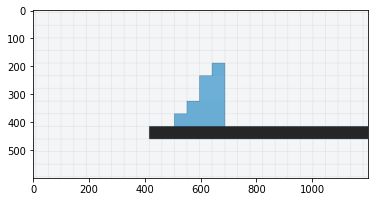

11754 5.025828530456765


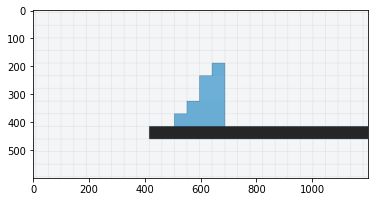

!!!!!!!!!!!!!!!!!!!!!!!! Specie  23 !!!!!!!!!!!!!!!!!!!!!!!!!!!
4926 6.274879412953683


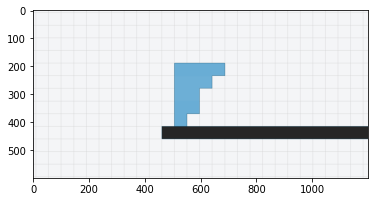

3945 6.78797211918114


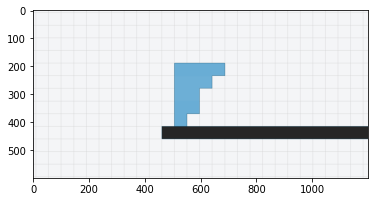

11756 1.8786954033537628


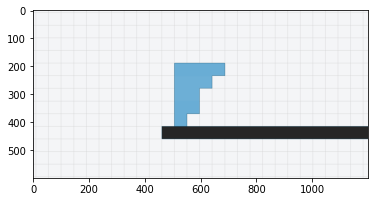

11757 1.1840919186676049


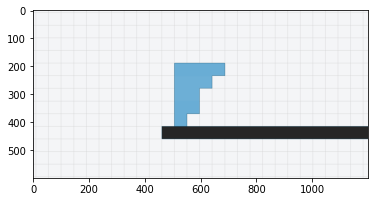

In [4]:
for k, v in pop.species.species.items():
    print("!!!!!!!!!!!!!!!!!!!!!!!! Specie ", k, "!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    for g in v.members.values():
        if g.fitness != None and g.fitness > 1:
            r, img = get_robot(g, params, neat_config)
            if img is not None:
                print(g.key, g.fitness)
                plt.imshow(img)
                plt.show()

In [8]:
# g = champion
g = pop.population[11319]
params["save_to"] = "temp"
sgr.single_genome_fit(g, params, neat_config, False, True)

(1.4813436995609433, True)

SyntaxError: invalid syntax (4073858181.py, line 1)